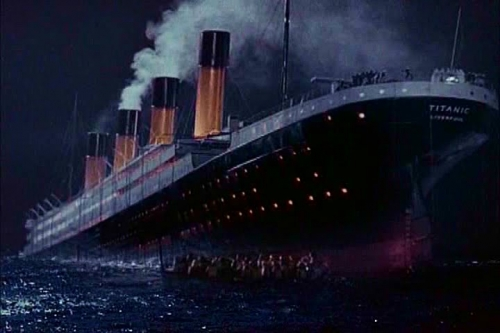

In [1]:
from IPython.display import Image
Image('e:\python4\S.O.S._Titanic_Ship_Sinking.jpg')

In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv(r'e:\python4\train.csv')

In [4]:
train.head()    #前五条数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()    #后五条数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train.shape    #DataFrame的形状

(891, 12)

In [10]:
train.Sex.value_counts()    #计算出男性和女性的人数总和

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train.isnull().sum()    #查看是否为空的数据并分列求和

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train.dtypes    #查看DataFrame每一列的数据类型

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
#train.Embarked.astype(type)    #更改这一列的数据类型，用.astype(type)方法

In [19]:
train.Survived.value_counts()    #查看幸存的人数，1代表存活

0    549
1    342
Name: Survived, dtype: int64

In [21]:
len(train[train.Survived == 1])

342

In [23]:
train[train.Survived == 1].size    #包含空值(即存活人数的DataFrame的所有元素个数)

4104

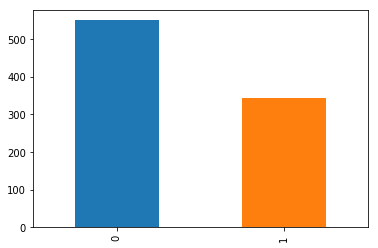

In [26]:
train.Survived.value_counts().plot.bar()    #画出存活人数与未存活人数的柱状图

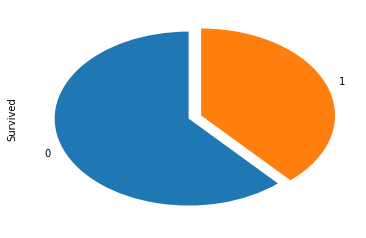

In [30]:
train.Survived.value_counts().plot.pie(explode = (0,0.1),startangle = 90)

In [31]:
train.Pclass.value_counts()     #查看各个等级舱的人数

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [71]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
grouped = train.groupby(['Pclass','Survived']).PassengerId.count()

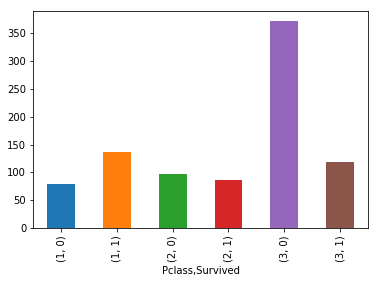

In [93]:
grouped.plot.bar()

In [90]:
grouped2 = train.groupby('Pclass').Survived.value_counts()

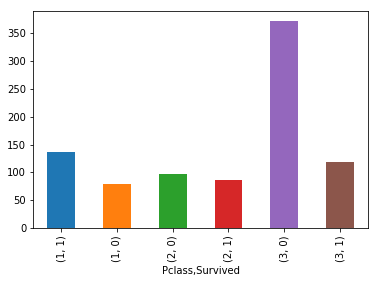

In [98]:
grouped2.plot.bar()    #画出通过船舱等级分组后的存活与死亡的人数柱状图

In [99]:
#创建一个透视表，值是ID的计数，index是存活或死亡，columns是船舱等级数
train_pt = train.pivot_table(values = 'PassengerId',index = 'Survived',columns = 'Pclass',aggfunc='count')

In [100]:
train_pt

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [101]:
train1 = train.drop('Cabin',axis = 1)    #删除Cabin这一列的数据

In [102]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [103]:
train1.isnull().sum()    #再次查看新的DataFrame的空值，发现Age存在空值过多

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [104]:
#索引Age这一列的数据并更改其中的空值用20填充
train1['Age'] = train1.Age.fillna(20)

In [105]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [107]:
#用.notnull()方法来判断'Embarked'这一列的数据是否为空，然后用train1索引其中不为空的信息
train2 = train1[train1['Embarked'].notnull()]

In [108]:
len(train2)

889

In [109]:
train2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [110]:
train2.shape

(889, 11)

In [111]:
train2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [113]:
#用.pivot_table()方法创建关于性别分类的存活数据透视表
train2.pivot_table(values = 'PassengerId',index = 'Survived',columns = 'Sex',aggfunc = 'count')

Sex,female,male
Survived,,
0,81,468
1,231,109


In [121]:
grouped3 = train2.groupby(['Sex','Survived']).PassengerId.count()

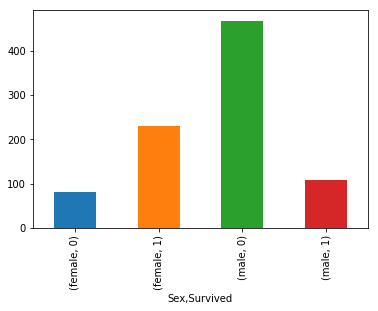

In [123]:
grouped3.plot.bar()    #画出通过性别分组后的存活或死亡柱状图

In [125]:
train3 = train2[train2['Survived'] == 1]

In [126]:
train3.shape

(340, 11)

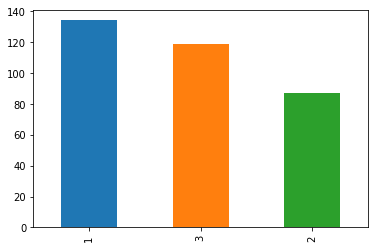

In [128]:
train3['Pclass'].value_counts().plot.bar()    #存活人数中各等级舱的人数分布

In [132]:
# 判断两个属性的相关性有多少
train2['Survived'].corr(train2['Pclass'])
#关系的强弱用绝对值来看，绝对值越大越有关系

-0.3355488593568253

In [134]:
#是否存活和是否和兄弟姐妹有关系
train2['Survived'].corr(train2['SibSp'])

-0.03403999879674903

In [135]:
#是否存活和Age的相关性
train2['Survived'].corr(train2['Age'])

-0.04552355546029025

In [136]:
age_train = train2[(train2['Age'] <= 12) | (train2['Age'] >= 60)]

In [164]:
age_train['Survived'].value_counts()

0    48
1    46
Name: Survived, dtype: int64

In [153]:
children = train2[train2['Age'] <= 12]

In [154]:
oldman = train2[train2['Age'] >= 60]

In [158]:
chiold = pd.concat([children,oldman])

In [ ]:
chiold.groupby('')

In [138]:
age_train['Survived'].value_counts()

0    48
1    46
Name: Survived, dtype: int64

In [149]:
age_tt = train2.groupby('Age')['Survived'].value_counts()

In [150]:
age_tt.head()

Age   Survived
0.42  1           1
0.67  1           1
0.75  1           2
0.83  1           2
0.92  1           1
Name: Survived, dtype: int64

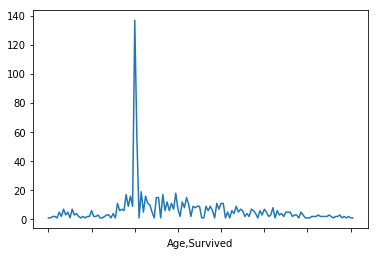

In [145]:
age_tt.plot()